<a href="https://colab.research.google.com/github/mrudulamadhavan/infyskill_internship/blob/main/Mini_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Credit Card Spending Habits in India**

This dataset contains insights into a collection of credit card transactions made in India, offering a comprehensive look at the spending habits of Indians across the nation. From the Gender and Card type used to carry out each transaction, to which city saw the highest amount of spending and even what kind of expenses were made, this dataset paints an overall picture about how money is being spent in India today.

### **Data Dictionary**

* **City**	The city in which the transaction took place. (String)
* **Date**	The date of the transaction. (Date)
* **Card Type**	The type of credit card used for the transaction. (String)
* **Exp Type**	The type of expense associated with the transaction. (String)
* **Gender**	The gender of the cardholder. (String)
* **Amount**	The amount of the transaction. (Number)

### **Concepts Used**
* **Exploratory Data Analysis**



In [3]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("Credit card transactions - India - Simple.csv")
df.head()

,index,City,Date,Card Type,Exp Type,Gender,Amount
0,0,"Delhi, India",29-Oct-14,Gold,Bills,F,82475
1,1,"Greater Mumbai, India",22-Aug-14,Platinum,Bills,F,32555
2,2,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738
3,3,"Greater Mumbai, India",12-Apr-14,Signature,Bills,F,123424
4,4,"Bengaluru, India",5-May-15,Gold,Bills,F,171574


In [6]:
df.shape

(26052, 7)

Our dataset has 26052 rows and 7 features.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26052 entries, 0 to 26051
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      26052 non-null  int64 
 1   City       26052 non-null  object
 2   Date       26052 non-null  object
 3   Card Type  26052 non-null  object
 4   Exp Type   26052 non-null  object
 5   Gender     26052 non-null  object
 6   Amount     26052 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 1.4+ MB


In [12]:
df.drop(columns='index',inplace=True) # Removing the irrelevent Column
df=df.replace(', India','', regex=True) # India is common

In [18]:
# Descriptive analysis of categorical columns
df.describe(include = "object").T

,count,unique,top,freq
City,26052,986,Bengaluru,3552
Date,26052,600,20-Sep-14,65
Card Type,26052,4,Silver,6840
Exp Type,26052,6,Food,5463
Gender,26052,2,F,13680


In [17]:
# Statistical summary for numerical variables.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Amount,26052.0,156411.537425,103063.254287,1005.0,77120.25,153106.5,228050.0,998077.0


**Observations**

From the categorical features, we observe that:

* Bengaluru is most frequent in transactions.
* Silver is the most used card Category type.
* Most of the transactions are done in food Category.
* Female does the most no of transactions.

From the numerical column (Amount), we observe that:
* The amount spent is ranging from 1k to 998k.
> * 25% of transactions amount lies between 1005 to 77k.
> * 50 % of transactions lies between 77k to 228k.
> * 25 % of transaction lies between 228k to 998k.


In [19]:
df.nunique()

City           986
Date           600
Card Type        4
Exp Type         6
Gender           2
Amount       24972
dtype: int64

In [20]:
df.columns


Index(['City', 'Date', 'Card Type', 'Exp Type', 'Gender', 'Amount'], dtype='object')

In [21]:
for x in ['City', 'Date', 'Card Type', 'Exp Type', 'Gender']:
    df[x] = df[x].astype("category")

In [22]:
# Examine the unique values in categorical column
col_names = ['City', 'Date', 'Card Type', 'Exp Type', 'Gender']
for x in col_names :
    print(x.upper()," : ",df[x].unique())
    print("_"*25)
    print('\033[1m'+"Value counts : "+ '\033[0m')

    print(df[x].value_counts())
    print("_"*30)
    print('\033[1m'+ "Normalised Value counts : "+ '\033[0m')
    print(df[x].value_counts(normalize=True).round(2))
    print("-"*80)

CITY  :  ['Delhi', 'Greater Mumbai', 'Bengaluru', 'Ahmedabad', 'Markapur', ..., 'Changanassery', 'Tirur', 'Srikalahasti', 'Wanaparthy', 'Fazilka']
Length: 986
Categories (986, object): ['Achalpur', 'Adilabad', 'Adityapur', 'Adoni', ..., 'Zamania', 'Zira',
                           'Zirakpur', 'Zunheboto']
_________________________
Value counts : 
Bengaluru         3552
Greater Mumbai    3493
Ahmedabad         3491
Delhi             3482
Hyderabad          784
                  ... 
Tirur                1
Mahbubnagar          1
Alirajpur            1
Varanasi             1
Vellore              1
Name: City, Length: 986, dtype: int64
______________________________
Normalised Value counts : 
Bengaluru         0.14
Greater Mumbai    0.13
Ahmedabad         0.13
Delhi             0.13
Hyderabad         0.03
                  ... 
Tirur             0.00
Mahbubnagar       0.00
Alirajpur         0.00
Varanasi          0.00
Vellore           0.00
Name: City, Length: 986, dtype: float64
--------

In [30]:
df.groupby(['Exp Type','Card Type','Gender']).agg(['count', 'mean', 'median', 'max', 'min']).round(2)

Amount                                   
                                count       mean    median     max   min
Exp Type      Card Type Gender                                          
Bills         Gold      F         695  206586.36  167044.0  996754  1056
                        M         561  146089.88  145463.0  298960  1103
              Platinum  F         688  207965.25  176750.5  998077  2119
                        M         541  145928.84  148125.0  299967  2333
              Signature F         699  206795.96  173456.0  994537  1026
                        M         560  145651.96  141371.5  299980  1274
              Silver    F         778  191294.95  167166.5  955468  1078
                        M         556  152100.69  154846.0  299981  1169
Entertainment Gold      F         576  146714.27  147689.5  299495  1061
                        M         567  156897.78  164133.0  299610  1575
              Platinum  F         568  155525.51  154872.0  299017  1133
                        M         619  157140.95  158829.0  299140  1388
              Signature F         589  152166.29  153348.0  299936  1533
                        M         581  153223.82  157616.0  299481  1240
              Silver    F         651  147759.57  142921.0  299794  1074
                        M         611  151423.69  151449.0  299906  1610
Food          Gold      F         723  144768.96  144369.0  299641  1066
                        M         599  148728.71  146464.0  299162  1171
              Platinum  F         738  153366.44  153875.5  298838  1243
                        M         633  153450.83  153032.0  299751  1175
              Signature F         706  155011.03  156681.5  299689  1265
                        M         623  155393.30  160069.0  299641  1289
              Silver    F         845  148552.78  150995.0  299699  1028
                        M         596  149117.17  148371.5  299837  1018
Fuel          Gold      F         657  146744.58  146550.0  299642  1038
                        M         658  148833.94  146666.5  298784  1182
              Platinum  F         615  148317.62  149397.0  299568  2181
                        M         687  149714.74  149480.0  299796  1332
              Signature F         644  144849.31  142765.5  299664  1207
                        M         642  147218.89  141871.5  299613  1678
              Silver    F         701  158877.23  166601.0  298637  1845
                        M         653  155516.25  156947.0  299905  1161
Grocery       Gold      F         533  148773.87  150204.0  299920  1105
                        M         586  148379.49  152467.0  299431  1099
              Platinum  F         550  150947.84  156921.0  298417  1005
                        M         580  152309.50  151697.5  299353  1506
              Signature F         632  151779.73  152048.0  299510  1024
                        M         592  153391.09  151829.0  299550  1578
              Silver    F         713  150637.34  148447.0  298259  1104
                        M         568  152224.49  154539.0  299052  1139
Travel        Gold      F         103  140501.17  145059.0  291788  1070
                        M         109  153378.68  167896.0  293767  1200
              Platinum  F          93  140866.27  136851.0  299582  1496
                        M          86  129687.56  114880.0  297137  3364
              Signature F          98  154931.54  154779.0  296138  7743
                        M          81  152046.23  147630.0  297354  6875
              Silver    F          85  154235.95  138545.0  299618  5769
                        M          83  159071.45  167229.0  297660  4762

In [49]:
city=pd.DataFrame({'count' : df.groupby("City").size()}).reset_index()
df['City Name']=np.where(df.City.isin(city.nlargest(5,'count')['City'].tolist()), df.City, 'Other')
set_ord=city.nlargest(5,'count')['City'].tolist()
set_ord.append("Other")


In [50]:
df.groupby(["City Name",'Card Type']).size()

City Name       Card Type
Ahmedabad       Gold          809
                Platinum      900
                Signature     828
                Silver        954
Bengaluru       Gold          857
                Platinum      853
                Signature     859
                Silver        983
Delhi           Gold          863
                Platinum      791
                Signature     872
                Silver        956
Greater Mumbai  Gold          848
                Platinum      868
                Signature     820
                Silver        957
Hyderabad       Gold          194
                Platinum      210
                Signature     192
                Silver        188
Other           Gold         2796
                Platinum     2776
                Signature    2876
                Silver       2802
dtype: int64

Text(0.5, 1.0, 'Distribution of Card Type in various Cities')

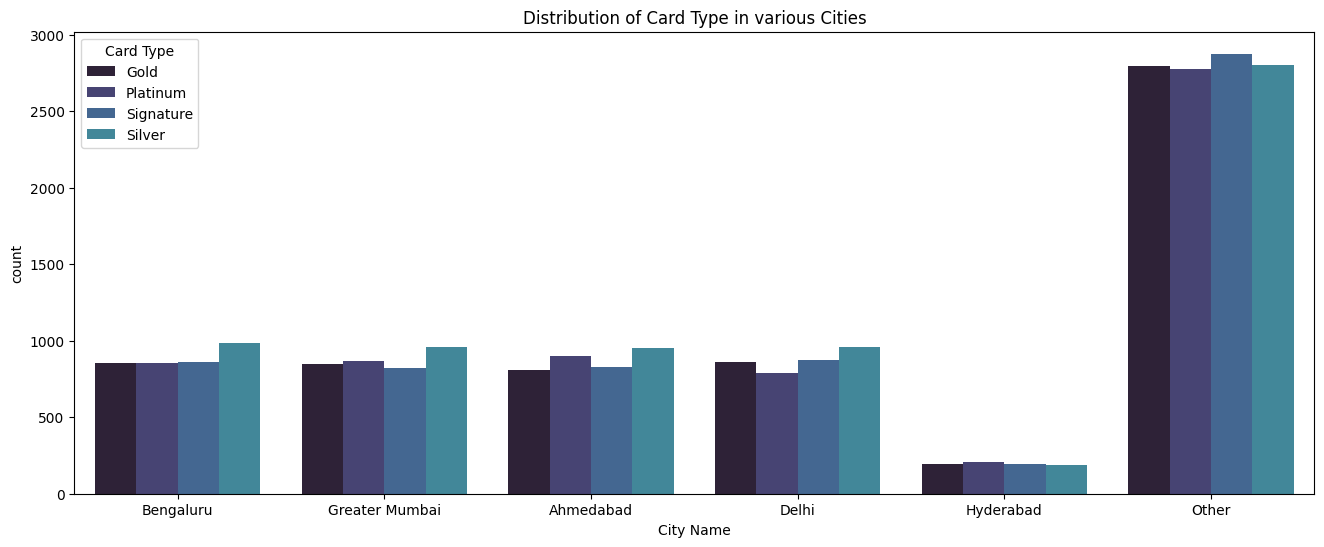

In [58]:
plt.figure(figsize = (16,6))
sns.countplot(x=df["City Name"],hue=df['Card Type'],order=set_ord,palette=sns.color_palette("mako"))
plt.title("Distribution of Card Type in various Cities")

* Silver is the most used card type in top 4 city(with most trxns) ['Bengaluru', 'Greater Mumbai', 'Ahmedabad','Delhi']
* Platinum card user does the most no of transactions in hyderabad
* While in rest of the city "Other" signature is the most and platinum the least used card.

In [46]:
df.groupby(["City Name",'Exp Type']).size()

City_Mask       Exp Type     
Ahmedabad       Bills             680
                Entertainment     622
                Food              801
                Fuel              760
                Grocery           628
                Travel              0
Bengaluru       Bills             735
                Entertainment     624
                Food              805
                Fuel              780
                Grocery           608
                Travel              0
Delhi           Bills             701
                Entertainment     594
                Food              784
                Fuel              782
                Grocery           621
                Travel              0
Greater Mumbai  Bills             728
                Entertainment     614
                Food              742
                Fuel              762
                Grocery           647
                Travel              0
Hyderabad       Bills             142
                Ente

Text(0.5, 1.0, 'Distribution of Expense Type in various Cities')

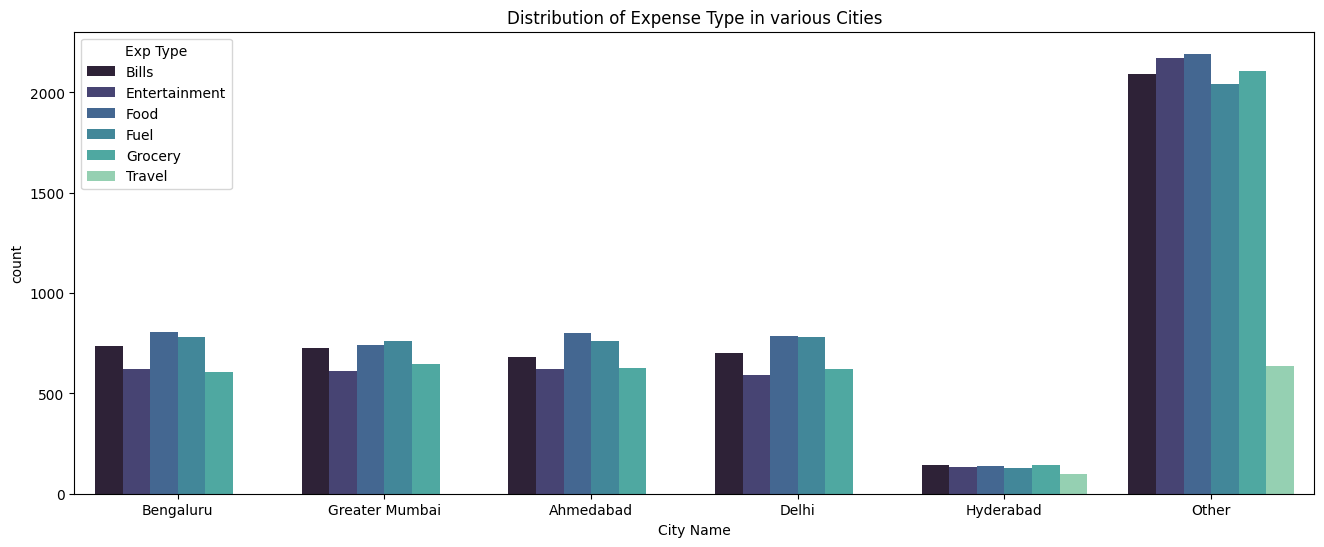

In [56]:
plt.figure(figsize = (16,6))
sns.countplot(x=df["City Name"],hue=df['Exp Type'],order=set_ord,palette=sns.color_palette("mako"))
plt.title("Distribution of Expense Type in various Cities")

* Food is most frequent expense category in "OTHERS" and 3 out of top 4 city(with most trxns)
* In Hyderabad Bills and Grocery exceeds food category with minor difference of 4
* In Greater Mumbai fuel category has the most frequent transactions
* There is no transactions done in top 4 city for travel category.

In [48]:
df.groupby(["City Name",'Gender']).size()

City Name       Gender
Ahmedabad       F         1876
                M         1615
Bengaluru       F         1960
                M         1592
Delhi           F         1923
                M         1559
Greater Mumbai  F         1922
                M         1571
Hyderabad       F          389
                M          395
Other           F         5610
                M         5640
dtype: int64

<Axes: xlabel='City Name', ylabel='count'>

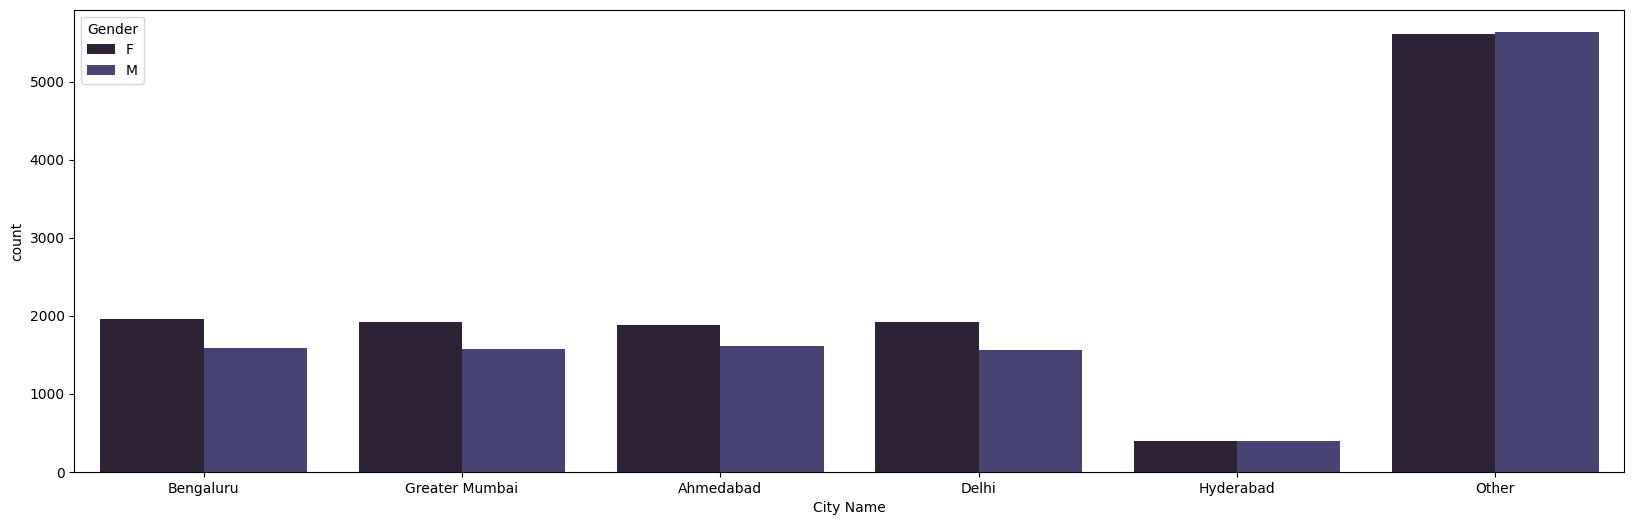

In [57]:
plt.figure(figsize = (20,6))
sns.countplot(x=df["City Name"],hue=df['Gender'],order=set_ord,palette=sns.color_palette("mako"))


* In top 4 city ['Bengaluru', 'Greater Mumbai', 'Ahmedabad','Delhi'] females dominates no of transactions
* The difference in no of transactions for female over man ranges from 200 to 400 in each of the city
* Male dominates over Hyderabad with minor difference of 6
* Male dominates over "Other" (rest of city combined ) with few no's around to 30-40





In [59]:
df.groupby('City Name').describe() # Top 5 cities

Amount                                                  \
                  count           mean            std     min       25%   
City Name                                                                 
Ahmedabad        3491.0  162645.176167  114120.339438  1024.0  80439.00   
Bengaluru        3552.0  161128.023367  110598.455781  1074.0  78969.75   
Delhi            3482.0  159945.207352  115475.932554  1005.0  73174.75   
Greater Mumbai   3493.0  165116.368737  120265.126185  1056.0  81374.00   
Hyderabad         784.0  146037.598214   84837.804389  1070.0  75278.00   
Other           11250.0  149914.503022   86508.250250  1018.0  74889.00   

                                               
                     50%        75%       max  
City Name                                      
Ahmedabad       155813.0  231673.50  996291.0  
Bengaluru       158051.0  229747.00  987935.0  
Delhi           152373.5  231531.75  996754.0  
Greater Mumbai  158108.0  233161.00  998077.0  
Hyderabad       144765.5  212849.25  299751.0  
Other           150772.5  224664.25  299980.0

Text(0.5, 1.0, 'Distribution of Amount vs City')

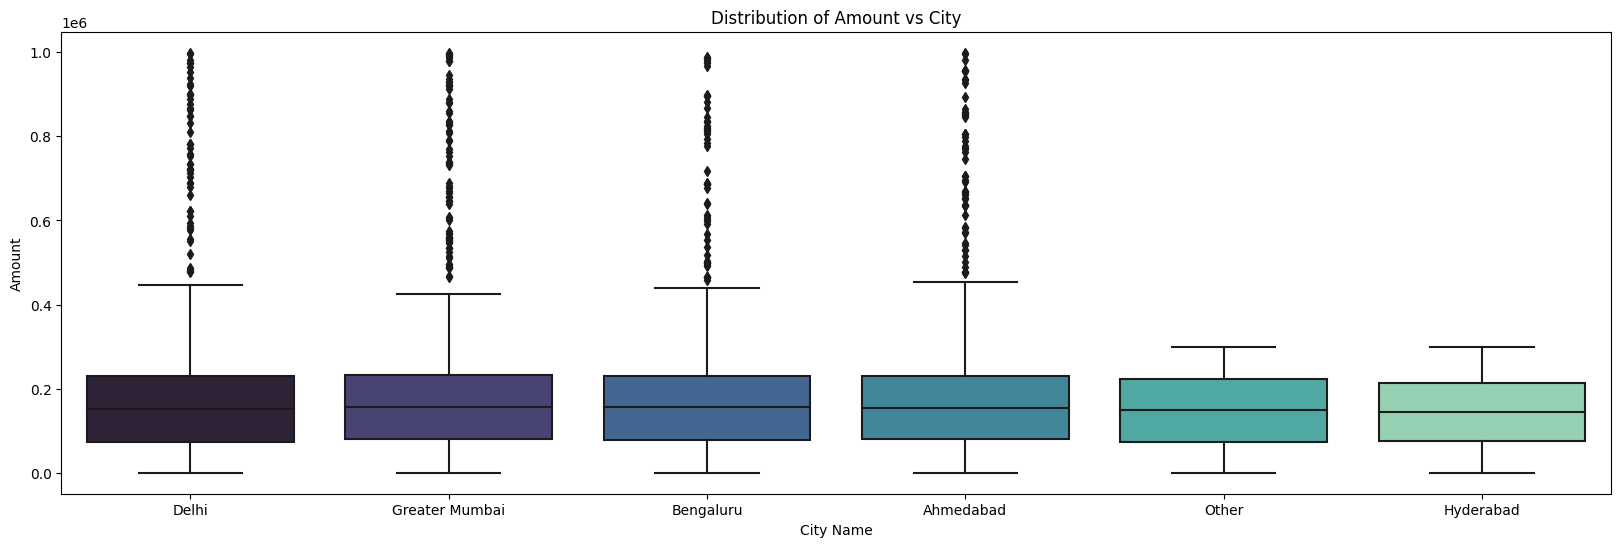

In [61]:
plt.figure(figsize = (20,6))
sns.boxplot(data=df,x='City Name' ,y='Amount',palette=sns.color_palette("mako"))
plt.title("Distribution of Amount vs City")

* Mean amount for transaction lies around 150k (approx)
* Minimum amount spent and Median amount spent among all city category lies close to each other.


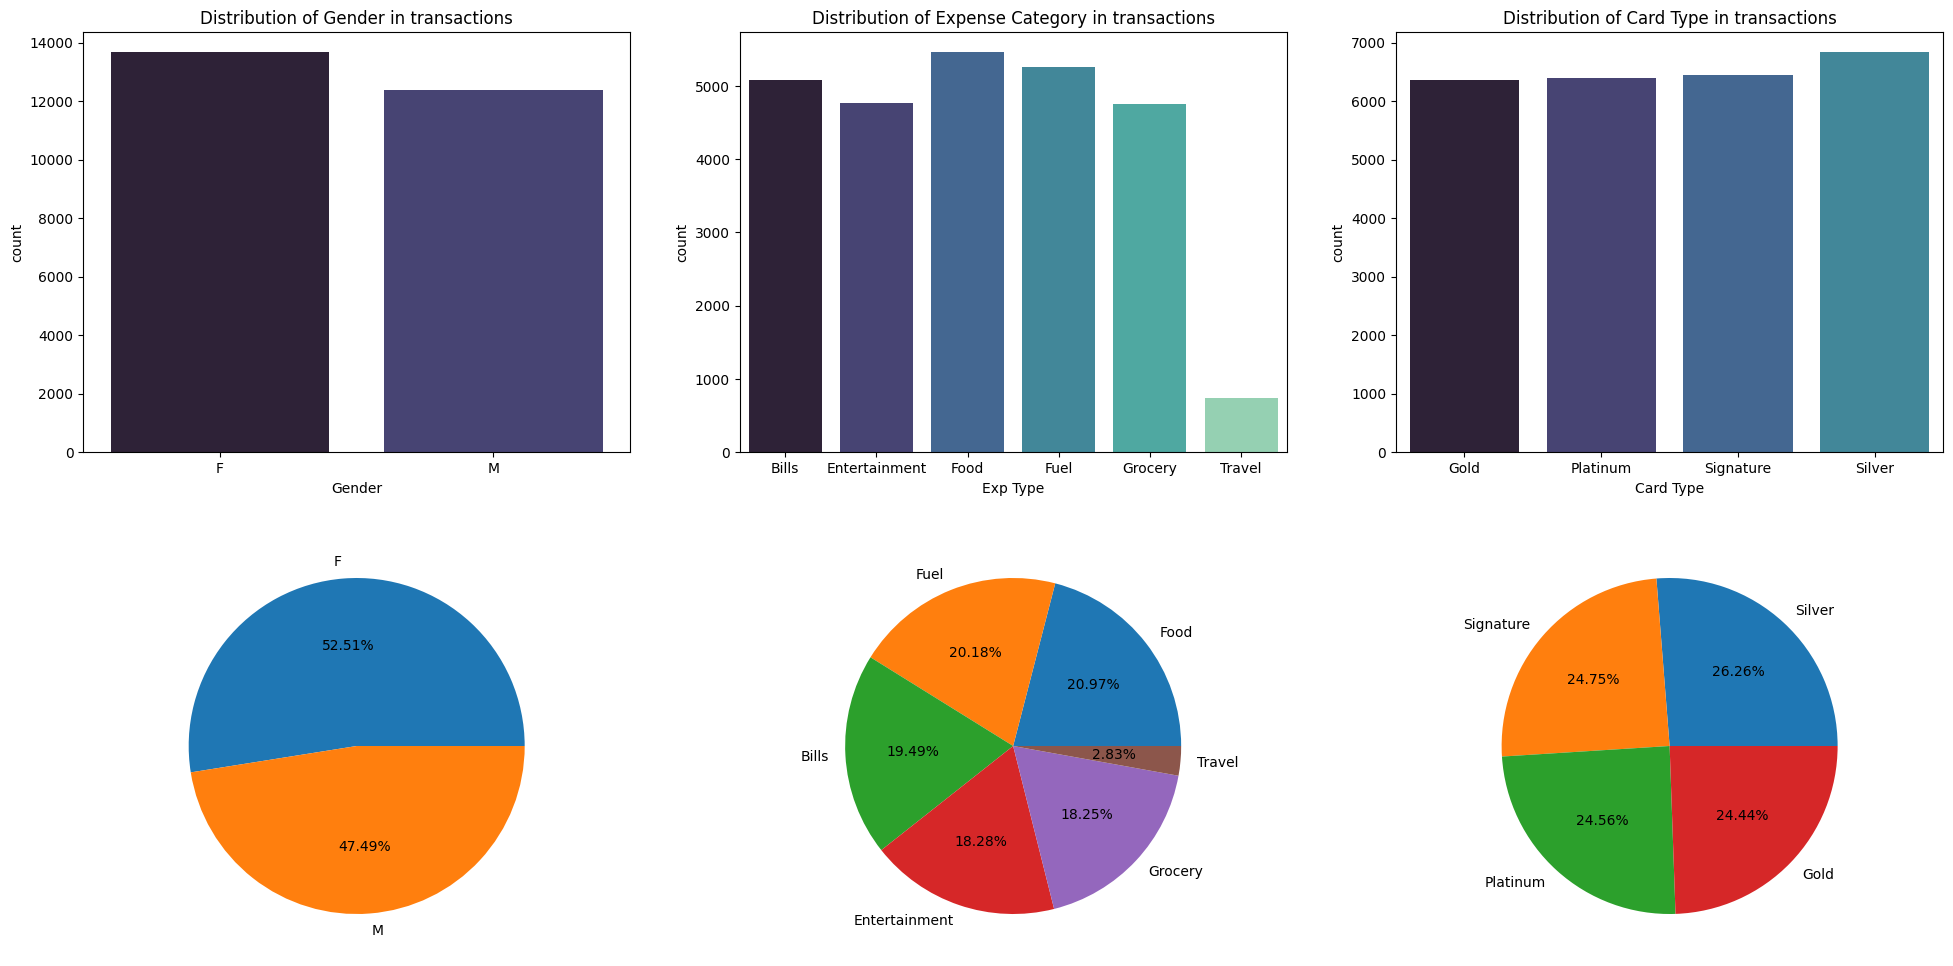

In [62]:

plt.subplots(2,3,figsize=(24,12))

plt.subplot(2,3,1)
sns.countplot(x=df["Gender"],palette=sns.color_palette("mako"))
plt.title("Distribution of Gender in transactions")

plt.subplot(2,3,2)
sns.countplot(x=df["Exp Type"],palette=sns.color_palette("mako"))
plt.title("Distribution of Expense Category in transactions")

plt.subplot(2,3,3)
sns.countplot(x=df["Card Type"],palette=sns.color_palette("mako"))
plt.title("Distribution of Card Type in transactions")

plt.subplot(2,3,4)
plt.pie(x=df["Gender"].value_counts(),labels=df["Gender"].value_counts().index,autopct="%0.2f%%")

plt.subplot(2,3,5)
plt.pie(x=df["Exp Type"].value_counts(),labels=df["Exp Type"].value_counts().index,autopct="%0.2f%%")

plt.subplot(2,3,6)
plt.pie(x=df["Card Type"].value_counts(),labels=df["Card Type"].value_counts().index,autopct="%0.2f%%")
plt.show()

* The no of transactions done by female is 5 % more then the male.
* We have 6 different expense categories in transactions.
* Food has the highest 20.97%.
* We can see most of Exp type categories (5 out of 6) has transaction share between 18.25 to 20.97
* We have (travel) 1 out of 6 category which has the least share with 2.83 %
* We have 4 different card type categories
* All 4 transaction share lie between 24.44 % to 26.26 %
* Silver is the most used card type in transactions

### **Non Graphical Analysis**

In [64]:
df.groupby(['Card Type','Gender']).describe()

Amount                                                  \
                   count           mean            std     min       25%   
Card Type Gender                                                           
Gold      F       3287.0  159091.020079  121538.044533  1038.0  73667.50   
          M       3080.0  149872.517208   85645.824151  1099.0  74966.00   
Platinum  F       3252.0  163573.256150  115396.940061  1005.0  81216.75   
          M       3146.0  151207.498411   85676.176116  1175.0  78069.25   
Signature F       3368.0  162709.367280  117954.072330  1024.0  77200.00   
          M       3079.0  151034.737252   86767.996243  1240.0  76314.00   
Silver    F       3773.0  159669.618076  109501.051441  1028.0  77400.00   
          M       3067.0  152324.826867   87071.732783  1018.0  79104.50   

                                                 
                       50%        75%       max  
Card Type Gender                                 
Gold      F       149418.0  224995.00  996754.0  
          M       150944.0  223809.25  299610.0  
Platinum  F       157449.0  230606.00  998077.0  
          M       151100.5  224513.25  299967.0  
Signature F       156323.0  232875.50  994537.0  
          M       150418.0  226617.50  299980.0  
Silver    F       155283.0  231830.00  955468.0  
          M       152958.0  227985.00  299981.0

In [65]:
df.groupby(['Exp Type','Gender']).describe()

Amount                                                  \
                       count           mean            std     min       25%   
Exp Type      Gender                                                           
Bills         F       2860.0  202809.604545  183838.739960  1026.0  84692.75   
              M       2218.0  147446.800721   86743.067538  1103.0  70693.50   
Entertainment F       2384.0  150446.028943   87349.917747  1061.0  72821.75   
              M       2378.0  154656.939865   85866.032975  1240.0  81314.00   
Food          F       3012.0  150337.742032   86359.783304  1028.0  75275.25   
              M       2451.0  151736.731946   86666.914908  1018.0  76354.00   
Fuel          F       2617.0  149897.753535   86303.779979  1038.0  75897.00   
              M       2640.0  150323.257576   85572.373878  1161.0  79129.75   
Grocery       F       2428.0  150595.962932   86758.040202  1005.0  74531.00   
              M       2326.0  151573.914445   86123.306959  1099.0  77559.50   
Travel        F        379.0  147402.453826   84138.286902  1070.0  79449.00   
              M        359.0  148718.888579   89292.822418  1200.0  68352.50   

                                                     
                           50%        75%       max  
Exp Type      Gender                                 
Bills         F       170763.0  251943.50  998077.0  
              M       148405.0  222329.25  299981.0  
Entertainment F       150158.5  227840.25  299936.0  
              M       157918.5  228704.00  299906.0  
Food          F       151941.5  225124.50  299699.0  
              M       151201.0  225563.50  299837.0  
Fuel          F       151512.0  223706.00  299664.0  
              M       148679.0  225832.50  299905.0  
Grocery       F       151854.5  224839.75  299920.0  
              M       152680.5  226511.75  299550.0  
Travel        F       142755.0  213139.50  299618.0  
              M       149433.0  226564.00  297660.0

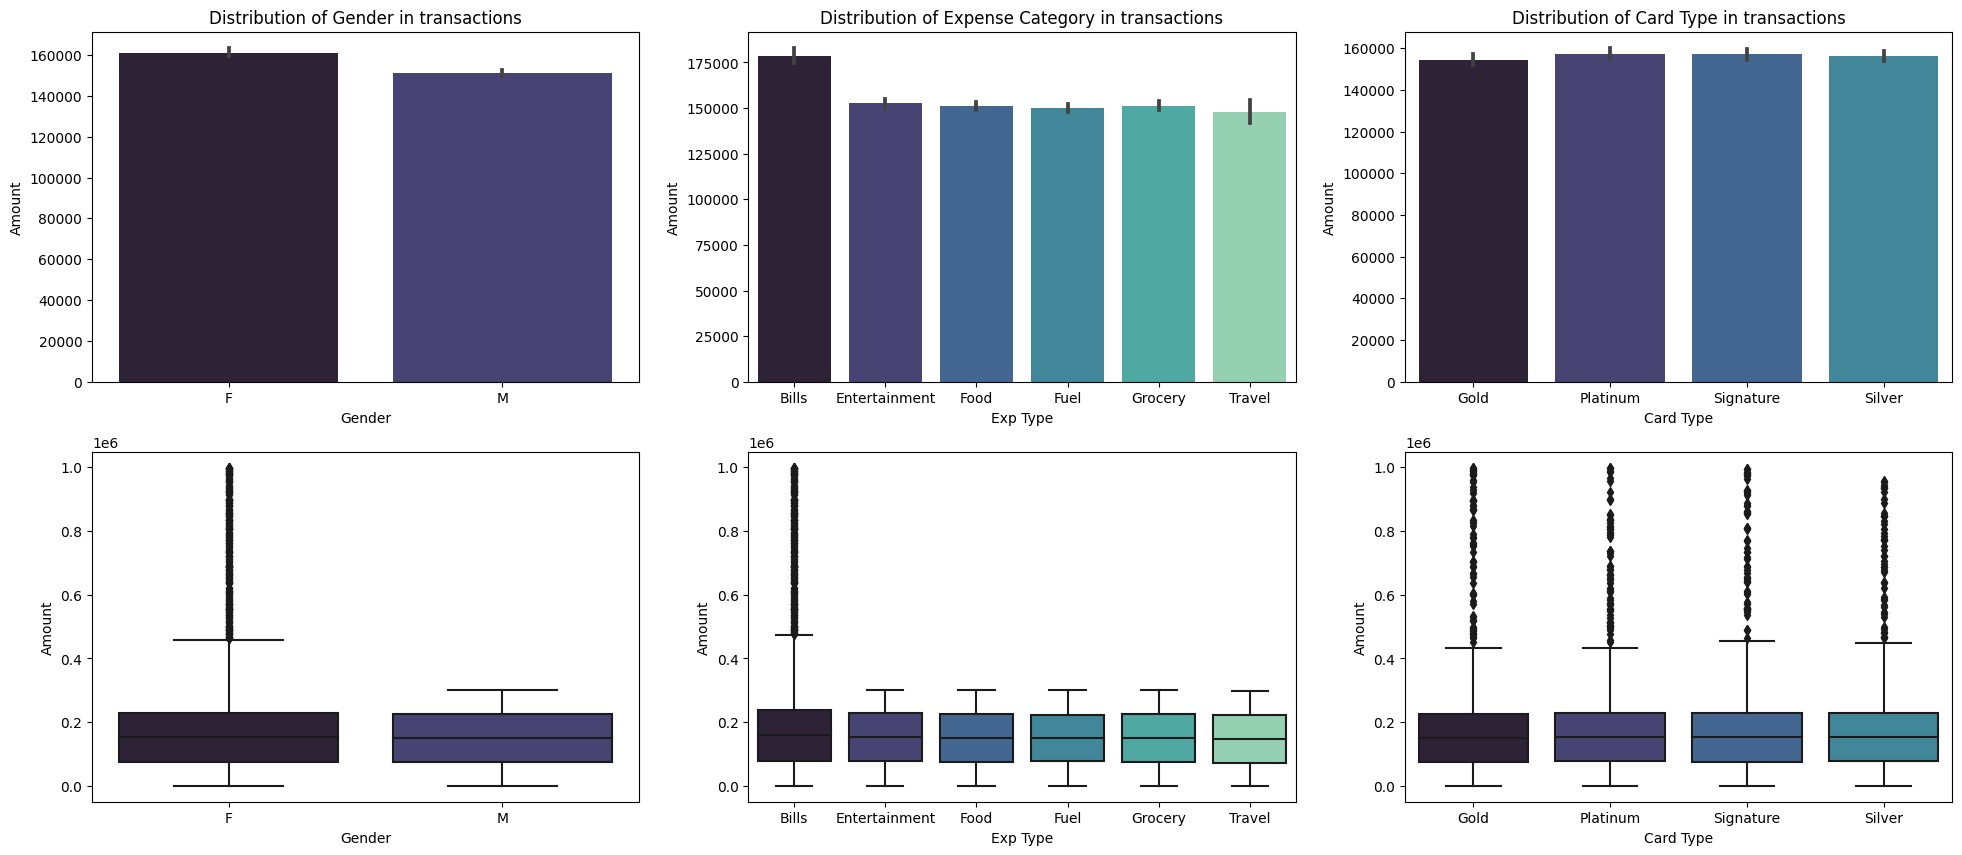

In [66]:
plt.subplots(2,3,figsize=(24,10))

plt.subplot(2,3,1)
sns.barplot(x=df["Gender"],y=df["Amount"],palette=sns.color_palette("mako"))
plt.title("Distribution of Gender in transactions")

plt.subplot(2,3,2)
sns.barplot(x=df["Exp Type"],y=df["Amount"],palette=sns.color_palette("mako"))
plt.title("Distribution of Expense Category in transactions")

plt.subplot(2,3,3)
sns.barplot(x=df["Card Type"],y=df["Amount"],palette=sns.color_palette("mako"))
plt.title("Distribution of Card Type in transactions")


plt.subplot(2,3,4)
sns.boxplot(data=df,x='Gender' ,y='Amount',palette=sns.color_palette("mako"))

plt.subplot(2,3,5)
sns.boxplot(data=df,x='Exp Type' ,y='Amount',palette=sns.color_palette("mako"))

plt.subplot(2,3,6)
sns.boxplot(data=df,x='Card Type' ,y='Amount',palette=sns.color_palette("mako"))

plt.show()

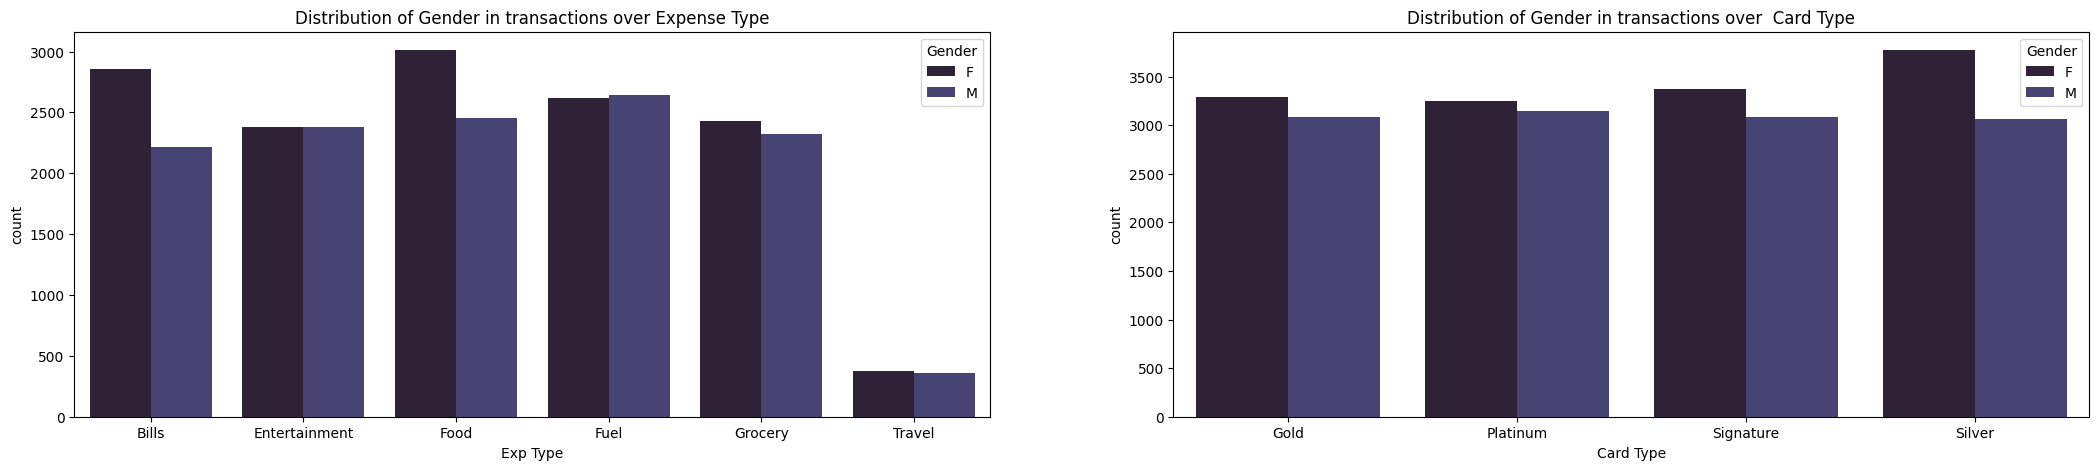

In [67]:
plt.subplots(1,2,figsize=(26,5))
plt.subplot(1,2,1)
sns.countplot(x=df["Exp Type"],hue=df["Gender"],palette=sns.color_palette("mako"))
plt.title("Distribution of Gender in transactions over Expense Type")

plt.subplot(1,2,2)
sns.countplot(x=df["Card Type"],hue=df["Gender"],palette=sns.color_palette("mako"))
plt.title("Distribution of Gender in transactions over  Card Type")
plt.show()

* Female has high no transactions in almost all exp category except fuel.
* Female has high no transactions in all Card type

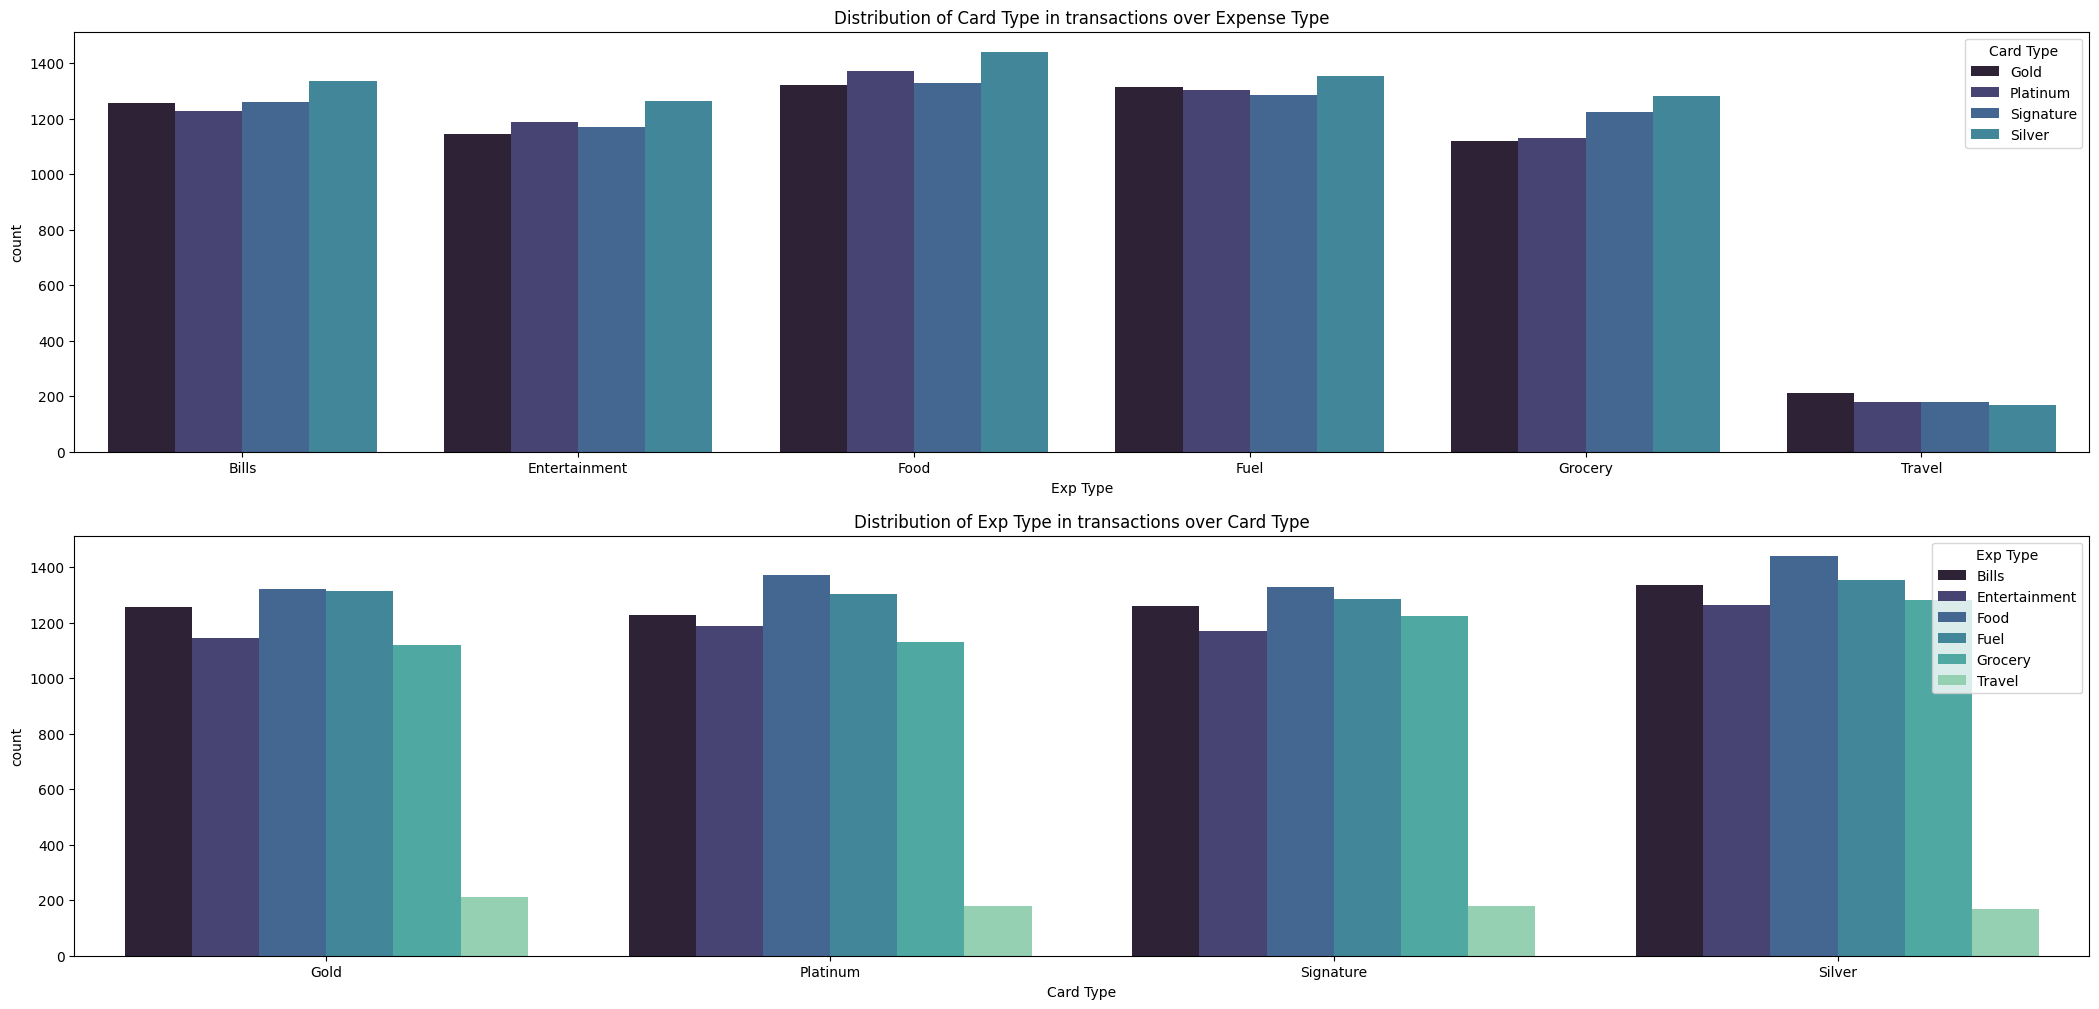

In [68]:
plt.subplots(2,1,figsize=(26,12))

plt.subplot(2,1,1)
sns.countplot(x=df["Exp Type"],hue=df["Card Type"],palette=sns.color_palette("mako"))
plt.title("Distribution of Card Type in transactions over Expense Type")

plt.subplot(2,1,2)
sns.countplot(x=df["Card Type"],hue=df["Exp Type"],palette=sns.color_palette("mako"))
plt.title("Distribution of Exp Type in transactions over Card Type")
plt.show()

## **Conclusions**
* Top 3 City having highest no of transactions are Bengaluru, Greater Mumbai and Ahmedabad
* Last 3 City having lowest no of transactions are Alirajpur, Bagaha and Changanassery
* Silver is the highest used card & Gold is the least used card type.
* Food has the highest no of transactions whereas Travel has the lowest no of transactions.
* Females has the most no of transactions than Males.
* Silver has the highest overall amount while gold is least contribution to total amount.
* Bills has the highest overall amount while travel is least contribution to total amount.
* Female has the highest overall amount than men who contributes to total amount
* Only in Fuel expense subcategory no of transactions dominates for men.
* All subcategories in Card type dominated by womens
* Silver card holder dominates in all sub categories except Travel.
* Gold card holder has most transactions in travel sector
* Food is the most frequent category in all card types & travel being the least